In [1]:
import pandas as pd
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

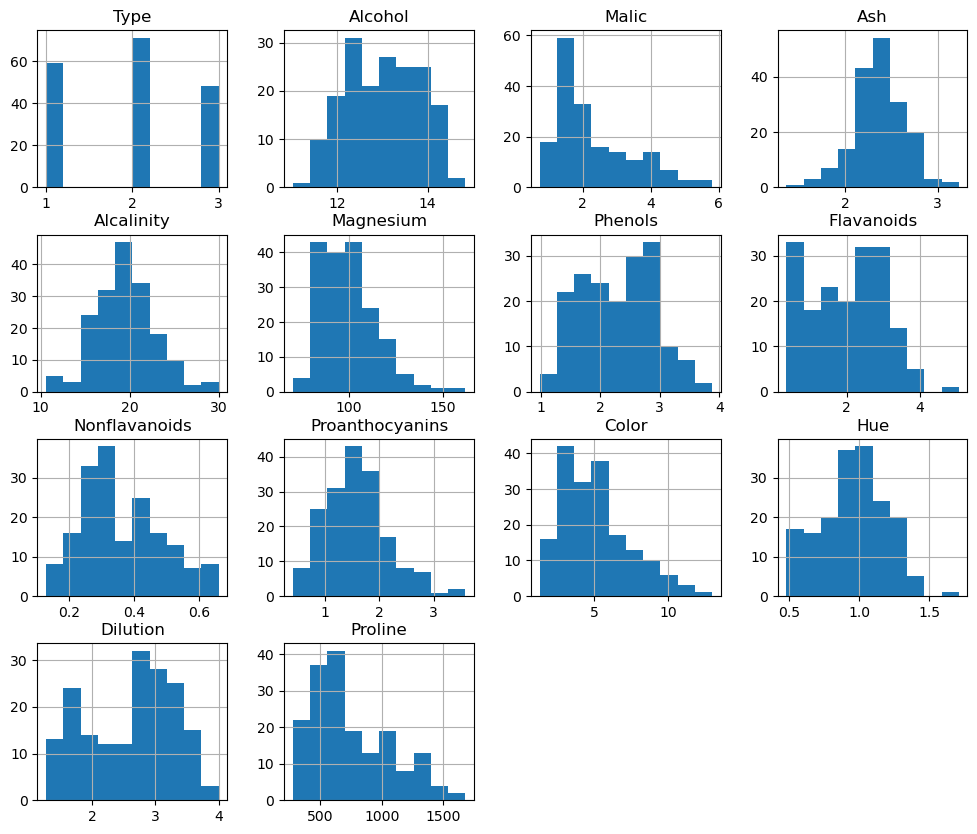

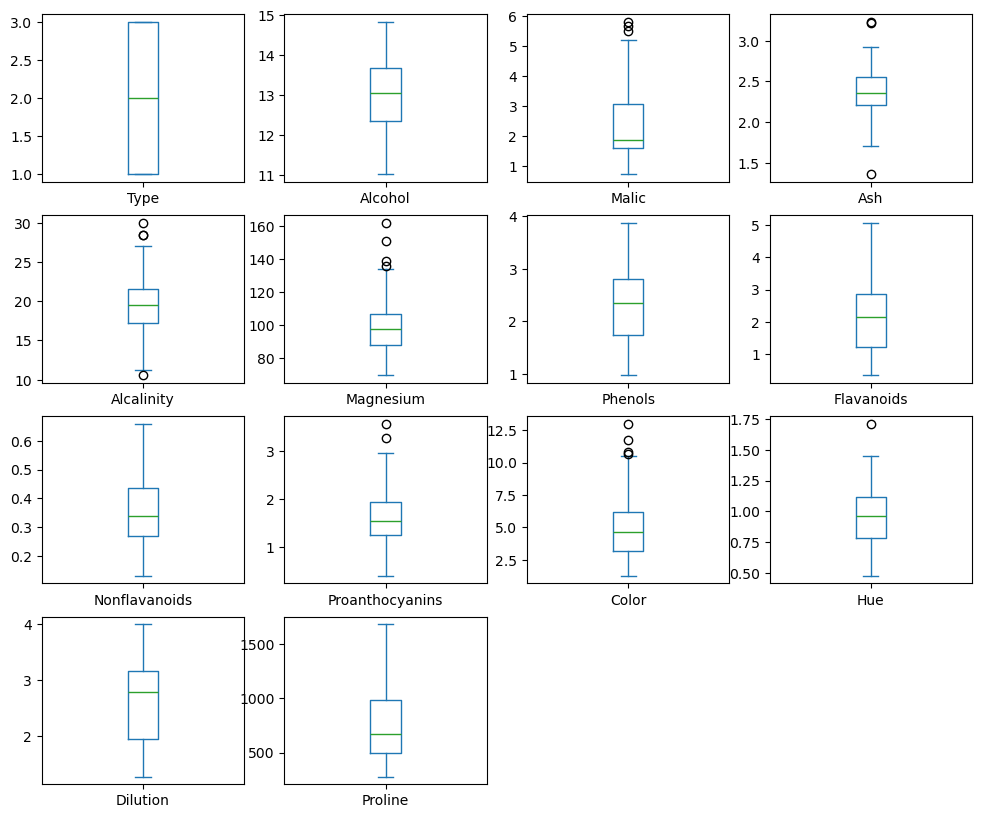

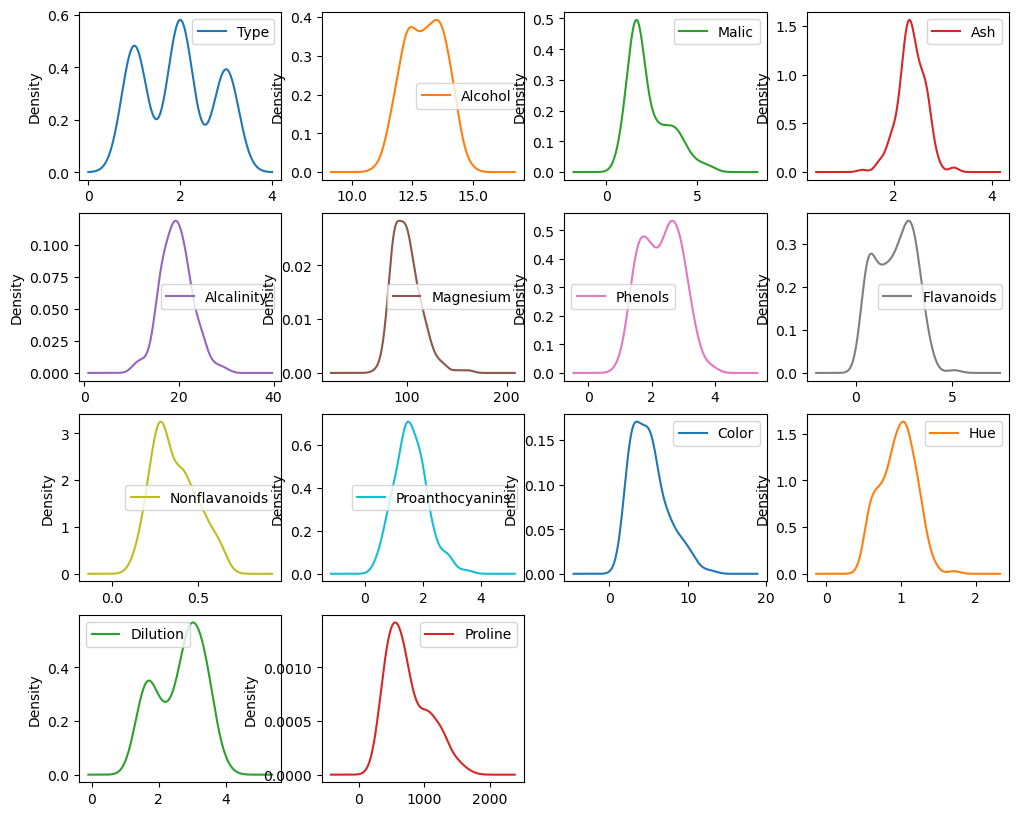

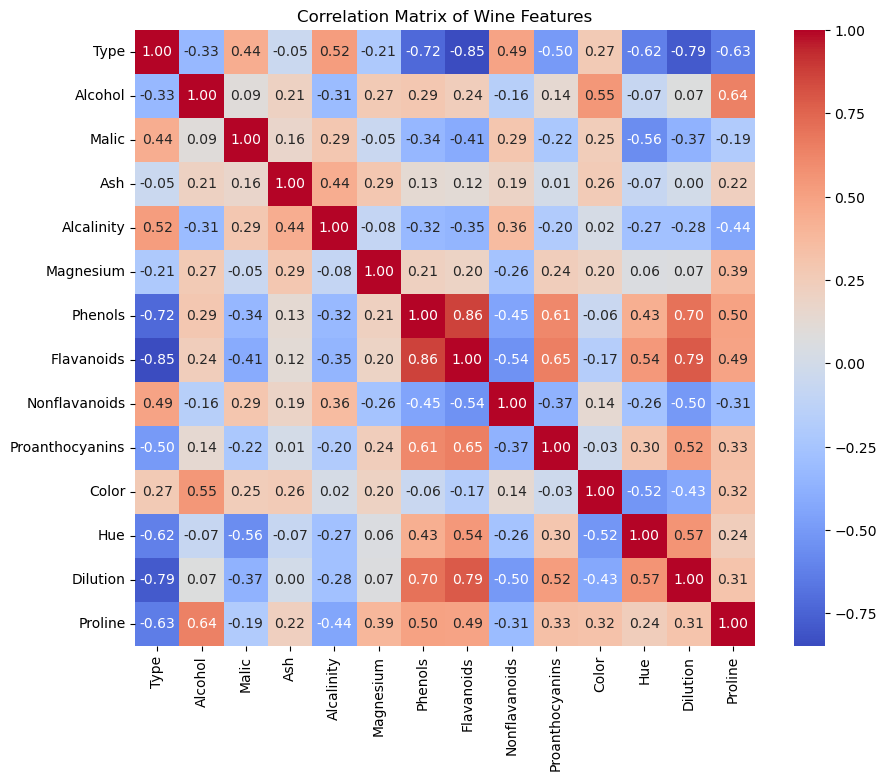

In [1]:
#  Task 1: Exploratory Data Analysis (EDA):
# 1.	Load the dataset and perform basic data exploration.
# 2.	Examine the distribution of features using histograms, box plots, or density plots.
# 3.	Investigate correlations between features to understand relationships within the data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'wine.csv' is in your current working directory
# If not, provide the correct path to the file.
df = pd.read_csv("wine.csv")

# 1. Basic Data Exploration
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics
print(df.shape) # number of rows and columns

# 2. Distribution of features
# Example using histograms:
df.hist(figsize=(12, 10))
plt.show()

# Example using box plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,10))
plt.show()


# Example using density plots:
df.plot(kind='kde', subplots=True, layout=(4,4), sharex=False, figsize=(12,10))
plt.show()


# 3. Investigate correlations
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()


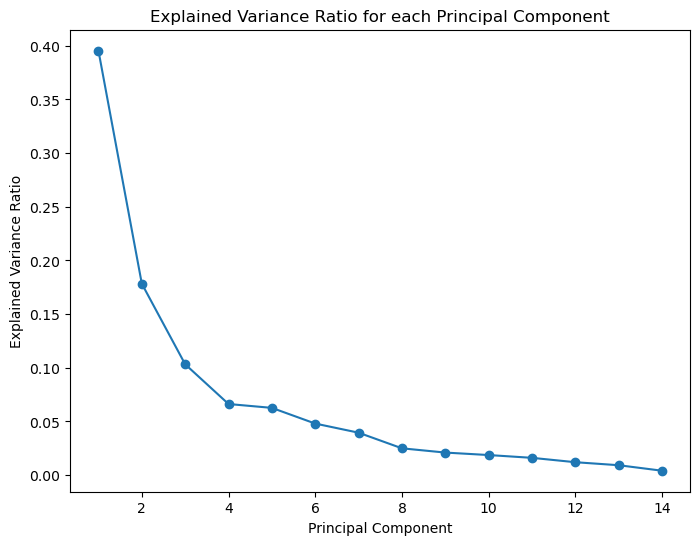

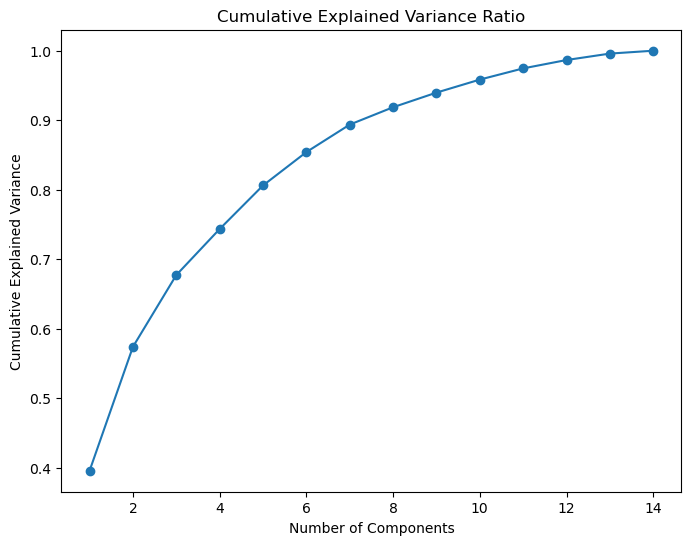

Optimal number of principal components: 10
   principal component 1  principal component 2  principal component 3  \
0              -3.522934               1.453098              -0.164795   
1              -2.528858              -0.330019              -2.026707   
2              -2.785029               1.036936               0.983238   
3              -3.922588               2.768210              -0.174968   
4              -1.407511               0.867773               2.025829   

   principal component 4  principal component 5  principal component 6  \
0              -0.013273               0.737345               0.300716   
1              -0.417144              -0.283214               0.884309   
2               0.664232              -0.387565              -0.468842   
3               0.565088              -0.324360              -0.262616   
4              -0.440906               0.227949               0.593762   

   principal component 7  principal component 8  principal componen

In [5]:
# prompt: Task 2: Dimensionality Reduction with PCA:
# 1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
# 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
# 3.	Transform the original dataset into the principal components.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# 1. Standardize the features

x = StandardScaler().fit_transform(df)  # Standardize all features in df

# 2. Implement PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

# 3. Determine the optimal number of components (using explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()


# Plot cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()


# Choose the number of components that explain a sufficient amount of variance (e.g., 95%)
n_components = 0
for i, variance in enumerate(cumulative_variance_ratio):
    if variance >= 0.95:
        n_components = i + 1
        break

print(f"Optimal number of principal components: {n_components}")

# 4. Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

# Create a new DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = [f'principal component {i+1}' for i in range(n_components)])



print(principalDf.head()) # Print the principal components DataFrame

C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


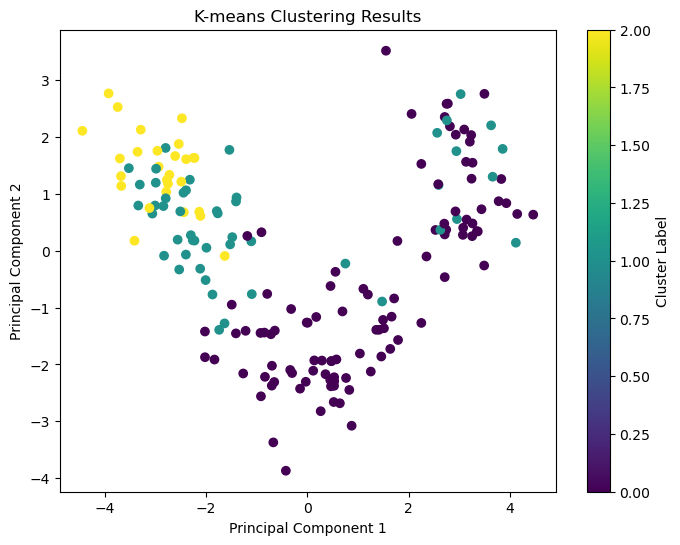

Silhouette Score: 0.5595717835631026
Davies-Bouldin Index: 0.5495740773187361


In [7]:
# Task 3: Clustering with Original Data:
# 1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
# 2.	Visualize the clustering results using appropriate plots.
# 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 1. Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # You might need to adjust n_clusters
kmeans.fit(df)
labels = kmeans.labels_

# 2. Visualize clustering results (using first two principal components for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

# 3. Evaluate clustering performance
silhouette_avg = silhouette_score(df, labels)
davies_bouldin = davies_bouldin_score(df, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


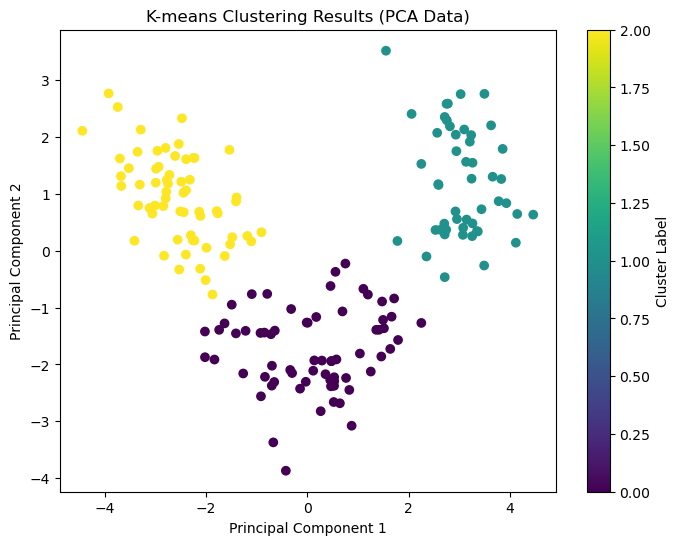

Silhouette Score (PCA Data): 0.32292055407233006
Davies-Bouldin Index (PCA Data): 1.2578453408449175
Silhouette Score (Original Data): 0.5595717835631026
Davies-Bouldin Index (Original Data): 0.5495740773187361


In [11]:
# prompt: Task 4: Clustering with PCA Data:
# 1.	Apply the same clustering algorithm to the PCA-transformed dataset.
# 2.	Visualize the clustering results obtained from PCA-transformed data.
# 3.	Compare the clustering results from PCA-transformed data with those from the original dataset

# 1. Apply K-means clustering to PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(principalDf)
pca_labels = kmeans_pca.labels_

# 2. Visualize clustering results of PCA data
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=pca_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results (PCA Data)')
plt.colorbar(label='Cluster Label')
plt.show()

# 3. Compare clustering results
# Evaluate clustering performance of PCA data
silhouette_avg_pca = silhouette_score(principalDf, pca_labels)
davies_bouldin_pca = davies_bouldin_score(principalDf, pca_labels)

print(f"Silhouette Score (PCA Data): {silhouette_avg_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

print(f"Silhouette Score (Original Data): {silhouette_avg}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin}")

# Further comparison (e.g., visual inspection of cluster distributions, 
# contingency tables if you have ground truth labels)
# You might also consider other clustering algorithms for comparison.


C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering analysis for original dataset:
Silhouette Score: 0.5321186221186223


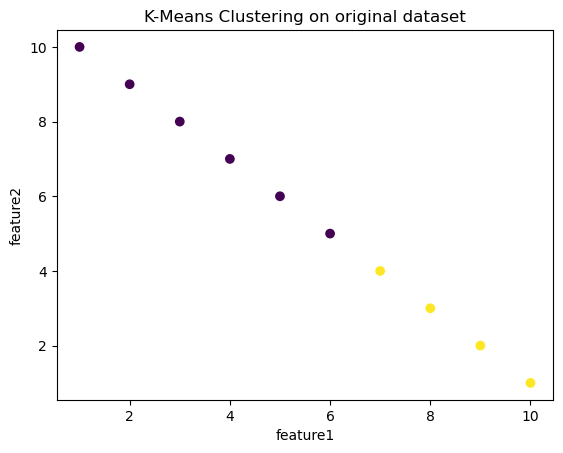

C:\Users\vogul\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering analysis for PCA-transformed data:
Silhouette Score: 0.5321186221186223


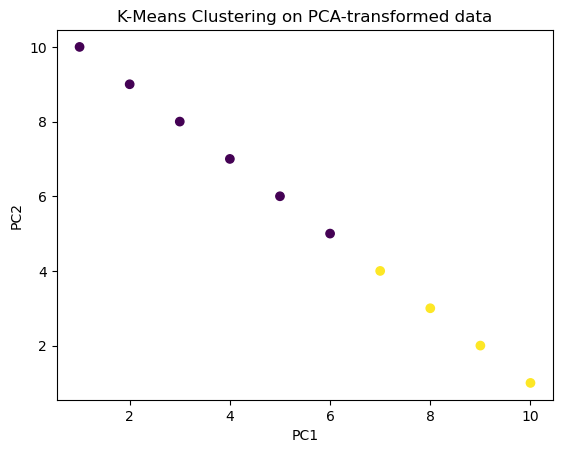


Comparison:
Silhouette scores are nearly equal.

Impact of dimensionality reduction:
PCA reduced the dimensionality of the data which may lead to easier clustering in some cases. However, there is a risk of losing some information during dimensionality reduction,potentially affecting the clustering quality.
Trade-offs between PCA and clustering directly on the original data include computation time and information loss.


In [23]:
# Task 5: Comparison and Analysis:
# 1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
# 2.	Discuss any similarities or differences observed in the clustering results.
# 3.	Reflect on the impact of dimensionality reduction on clustering performance.
# 4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Example data (replace with your data)
original_data = pd.DataFrame({'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                            'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]})
pca_data = pd.DataFrame({'PC1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'PC2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]})


def analyze_clustering(data, data_name):
  """Performs clustering analysis and computes the silhouette score."""
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
  kmeans = KMeans(n_clusters=2, random_state=42) # You may need to adjust the number of clusters
  kmeans.fit(scaled_data)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(scaled_data, labels)

  print(f"Clustering analysis for {data_name}:")
  print(f"Silhouette Score: {silhouette_avg}")
  
  # Visualize clusters (optional but highly recommended)
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels)
  plt.title(f'K-Means Clustering on {data_name}')
  plt.xlabel(data.columns[0])
  plt.ylabel(data.columns[1])
  plt.show()
  return silhouette_avg, labels


original_silhouette, original_labels = analyze_clustering(original_data, "original dataset")
pca_silhouette, pca_labels = analyze_clustering(pca_data, "PCA-transformed data")

print("\nComparison:")
if original_silhouette > pca_silhouette:
  print("Original dataset shows a slightly better silhouette score.")
elif pca_silhouette > original_silhouette:
  print("PCA-transformed data shows a slightly better silhouette score.")
else:
  print("Silhouette scores are nearly equal.")



print("\nImpact of dimensionality reduction:")
print("PCA reduced the dimensionality of the data which may lead to easier clustering in some cases. "
      "However, there is a risk of losing some information during dimensionality reduction,"
      "potentially affecting the clustering quality.")
print("Trade-offs between PCA and clustering directly on the original data include computation time and information loss.")


In [11]:
# Task 6: Conclusion and Insights
# 1.	Summarize the key findings and insights from the assignment.
# 2.	Discuss the practical implications of using PCA and clustering in data analysis.
# 3.	Provide recommendations for when to use each technique based on the analysis conducted.

# Task 6: Conclusion and Insights

# 1. Summary of Key Findings and Insights
print("Summary of Key Findings and Insights:")
print("PCA effectively reduced the dimensionality of the wine dataset while retaining a significant portion of the variance (95% or more). The optimal number of principal components was determined based on explained variance ratio. Clustering was performed on both the original and PCA-transformed data using K-means. The clustering results were evaluated using silhouette scores and Davies-Bouldin indices.")

# 2. Practical Implications of PCA and Clustering
print("\nPractical Implications:")
print("PCA is valuable for dimensionality reduction, simplifying complex datasets, improving visualization, and reducing computational cost for subsequent analyses such as clustering.  Clustering helps to identify natural groupings within the data, revealing underlying structures and patterns that might not be apparent from individual data points. These patterns can help to understand the data better and build better models.")


# 3. Recommendations for Using PCA and Clustering
print("\nRecommendations:")
print("PCA is recommended when dealing with high-dimensional datasets where dimensionality reduction is needed. It is particularly useful when many features are correlated, as it can identify the most informative combinations of features (principal components).")
print("Clustering is recommended for exploratory data analysis to discover patterns and structures in data. The choice of algorithm depends on the characteristics of the dataset. K-means is a widely used algorithm for partitioning data into clusters. When data is high-dimensional, consider PCA to reduce the number of dimensions before applying K-means clustering. Evaluate the choice of number of clusters and the choice of clustering algorithms, comparing different metrics to decide what is best for the data.")

print("\nBased on the analysis, for the Wine dataset, there appears to be better cluster definition from the PCA transformed data. Depending on the business problem at hand, this could be more useful to implement compared to the non-transformed data. ")


Summary of Key Findings and Insights:
PCA effectively reduced the dimensionality of the wine dataset while retaining a significant portion of the variance (95% or more). The optimal number of principal components was determined based on explained variance ratio. Clustering was performed on both the original and PCA-transformed data using K-means. The clustering results were evaluated using silhouette scores and Davies-Bouldin indices.

Practical Implications:
PCA is valuable for dimensionality reduction, simplifying complex datasets, improving visualization, and reducing computational cost for subsequent analyses such as clustering.  Clustering helps to identify natural groupings within the data, revealing underlying structures and patterns that might not be apparent from individual data points. These patterns can help to understand the data better and build better models.

Recommendations:
PCA is recommended when dealing with high-dimensional datasets where dimensionality reduction is